# `python` package for the Mars Climate Database: how to use?

*NB: to learn how to directly wrap within `python` the Fortran routine `call_mcd` compiled with `f2py`, look at the folder `test_mcd`*

In [1]:
# This line configures matplotlib to show figures embedded in the notebook.
%matplotlib inline

### General steps to follow to use the `mcd` class

**Step 1** import `mcd` class from `mcd` package

In [2]:
from mcd import mcd

**Step 2** create your request

In [3]:
req = mcd()

**Step 3** set the coordinates for your request (for instance, let us choose Curiosity landing site)

In [4]:
req.lat = -4.6 # latitude
req.lon = 137.4 # longitude
req.loct = 15. # local time
req.xz = 1. # vertical coordinate
req.xdate = 150.6 # areocentric longitude

**Step 4** retrieve fields from the Mars Climate Database (all fields are stored in the `req` object)

In [5]:
req.update()

**Step 5** print requested results

* Requested coordinates (for a reminder)

In [6]:
req.printcoord()

LAT -4.6 LON 137.4 LOCT 15.0 XDATE 150.6


* Main atmospheric variables

In [7]:
req.printmeanvar()

Pressure = 699.406 pascals. 
Density = 0.015 kilograms per cubic meter. 
Temperature = 251 kelvins ( -22 degrees celsius).
Zonal wind = -2.146 meters per second.
Meridional wind = -1.575 meters per second.
Total horizontal wind = 2.662 meters per second.


* Shortcut: `req.printmcd()` is equivalent to the three previous commands in a row (`update`+`printcoord`+`printmeanvar`)

In [8]:
req.printmcd()

LAT -4.6 LON 137.4 LOCT 15.0 XDATE 150.6
-------------------------------------------
Pressure = 699.406 pascals. 
Density = 0.015 kilograms per cubic meter. 
Temperature = 251 kelvins ( -22 degrees celsius).
Zonal wind = -2.146 meters per second.
Meridional wind = -1.575 meters per second.
Total horizontal wind = 2.662 meters per second.


* The extvar number can also be used to inquire a specific variable (see Fortran sources).

In [9]:
req.printextvar(22)

surface pressure RMS day to day variations (Pa) ..... 1.07004


* Another way to inquire for a specific variable is through a string.

In [10]:
req.printextvar("tsurf")

surface temperature (K) ..... 267.827


* Print all field

In [11]:
req.printallextvar()

Radial distance from planet center (m) ..... 3.39115e+06
Altitude above areoid (Mars geoid) (m) ..... -4487.05
Altitude above local surface (m) ..... 1.0
orographic height (m) (surf alt above areoid) ..... -4488.05
Ls, solar longitude of Mars (deg) ..... 150.6
LST local true solar time (hrs) ..... 15.0
Universal solar time (LST at lon=0) (hrs) ..... 5.84
Air heat capacity Cp (J kg-1 K-1) ..... 805.839
gamma=Cp/Cv Ratio of specific heats ..... 1.31007
density RMS day to day variations (kg/m^3) ..... 4.89128e-05
[not defined] ..... 0.0
[not defined] ..... 1.53627
scale height H(p) (m) ..... 12600.5
GCM orography (m) ..... -1538.88
surface temperature (K) ..... 267.827
daily max mean surface temperature (K) ..... 278.909
daily min mean surface temperature (K) ..... 185.295
surf. temperature RMS day to day variations (K) ..... 0.345282
surface pressure (Pa) ..... 699.462
GCM surface pressure (Pa) ..... 546.94
atmospheric pressure RMS day to day variations (Pa) ..... 1.12347
surface pressur

### 1D slices

Request 1D plot of diurnal cycle for one variable ...

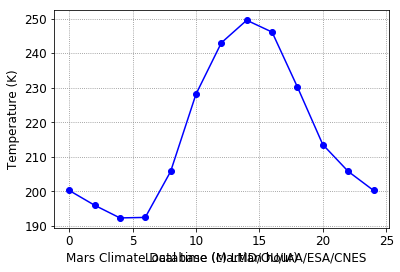

In [12]:
req.diurnal()
req.plot1d("t")

... and for several variables

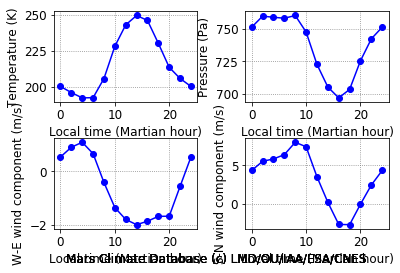

In [13]:
req.plot1d(["t","p","u","v"])

Request seasonal cycle (this takes a longer time)

~~~python
req.seasonal()
req.plot1d(["tsurf","u","v"])
~~~

1D slicing also works for vertical profiles. Start and end of profile can be set easily

--- as well as the kind of vertical coordinate through the `zkey` variable (as in MCD Fortran routines)

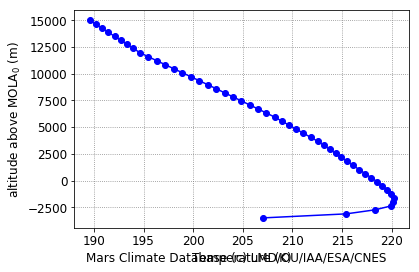

In [14]:
req.xzs = -3500.
req.xze = 15000.
req.zkey = 2
req.lat = 25.
req.lon = 195.
req.loct = 4.2
req.xdate = 140.
req.profile(nd=50)
req.plot1d("t")

It is a good place here to remind you that any field stored in the Mars Climate Database is inside the `req` object.

This allows you to work out further calculations, e.g. to combine several variables to obtain new diagnostics.

Here is for instance a calculation for potential temperature

In [15]:
tpot = req.temptab*((610./req.prestab)**(1.0/3.9))
print tpot

[ 201.29956354  211.35892722  216.08831079  219.63339834  221.66123652
  223.70771726  225.36258936  226.82782707  228.30155566  229.76270949
  231.13304217  232.50977608  233.89290786  235.28244641  236.71220597
  238.16013348  239.6151359   241.07723966  242.54645035  243.98444313
  245.34378496  246.70782243  248.07654103  249.44987228  250.82781755
  252.21034708  253.52737609  254.83340835  256.1419473   257.45289445
  258.7662038   260.08179693  261.39960677  262.73893452  264.10812305
  265.47954501  266.85307073  268.2286532   269.60617818  270.98560258
  272.36677425  273.80715621  275.60630851  277.41436579  279.23130363
  281.05713828  282.89187197  284.73548298  286.58800011  288.44938938]


### 1D slices: ASCII outputs

It is easy to get ASCII files containing 1D slices. Say, for instance, diurnal cycle of temperature.

In [16]:
req = mcd()
req.diurnal()
req.getascii("t",filename="diurnal.txt")
%cat diurnal.txt ; rm -rf diurnal.txt

##########################################################################################
### MCD_v5.2 with climatology average solar scenario.
### Ls 0.0deg. Latitude 0.0N Longitude 0.0E Altitude 10.0 m ALS Local time 0.0h
### --------------------------------------------------------------------------------------
### Column 1 is Local time (Martian hour)
### Column 2 is Temperature (K)
### --------------------------------------------------------------------------------------
### Retrieved on: 2018-06-07T12:53:07.011009
### Mars Climate Database (c) LMD/OU/IAA/ESA/CNES
##########################################################################################
    0.00000e+00    2.05772e+02
    2.00000e+00    2.00734e+02
    4.00000e+00    1.96411e+02
    6.00000e+00    1.92666e+02
    8.00000e+00    2.06076e+02
    1.00000e+01    2.24121e+02
    1.20000e+01    2.36739e+02
    1.40000e+01    2.45215e+02
    1.60000e+01    2.48675e+02
    1.80000e+01    2.34043e+02
    2.00000e+01    2.19

### 2D mapping

Simple 2D longitude-latitude map with default cylindrical view. Map projections can be used, provided `basemap` is installed -- for instance, for Robinson projection add `proj="robin"` to the `map2d` call below.

/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


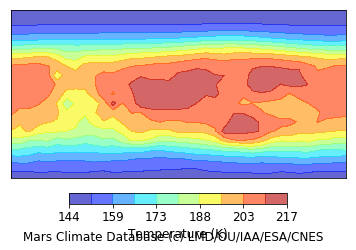

In [17]:
test = mcd()
test.loct = 15.
test.xz = 10000.
test.map2d("t")

You can also use the method `htmlmap2d` that will create a PNG file with your figure in it. This is the function actually used in the online MCD interface.

In [18]:
test.htmlmap2d("t")

/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/scipy/io/netcdf.py:299: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


Adding wind vectors can be done with the `incwind` argument.

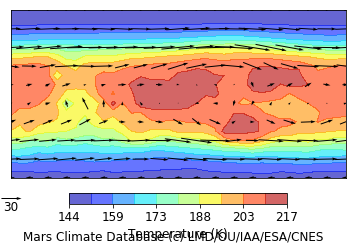

In [19]:
test.map2d("t",incwind=True)

NB: `map2d` works with several variables

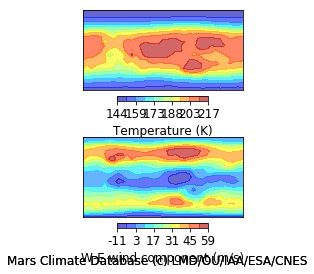

In [20]:
test.map2d(["t","u"])

### NB: to save figures

~~~python
import matplotlib.pyplot as mpl
mpl.savefig("temp.png",dpi=85,bbox_inches='tight',pad_inches=0.25)
~~~

To obtain a name corresponding to the request

In [21]:
figname = test.getnameset()+'.png'
print figname

310000.0NoneNone0.0NoneNone0.0NoneNone110.0NoneNone15.0NoneNone1.png
